In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [88]:
#the CSV files are in the same directory as the notebook, so using '.' to refer to the current directory
folder_path = '.'

# Get a list of CSV files in the current directory
extracted_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the DataFrames
season_dataframes = []

# Loop through each CSV file, read it into a DataFrame, add a 'Season' column, and append to the list
for file_name in extracted_files:
    season = file_name.replace('.csv', '')  # Extract season from file name
    df = pd.read_csv(file_name)  # No need to join path if in the same directory
    df['Season'] = season  # Add a 'Season' column
    season_dataframes.append(df)

# Concatenate all DataFrames into one
complete_data = pd.concat(season_dataframes, ignore_index=True)

# Display basic information about the DataFrame
complete_data.info() 
complete_data.head()

#Here are some additional details about the features( columns):
#1. members: the number of players.
#2. foreign_players: the number of foreign players in the team.
#3. mean_age: the mean age of all players.
#4. salaries: monthly salary charge.
#5. spending: transfer expenditure.
#6. MOY: Average players rating.
#7. rank: the rank of the team in the season.
#8. points: points gained in the season.
#9. BP: Goals.
#10. BC: goals against.
#11. DIF=BP-BC.
#12.Gain: the number of winnes.
#13. Null: number of draws.
#14. defeat: Number of losses.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                160 non-null    object 
 1   members             412 non-null    float64
 2   foreign_players     412 non-null    float64
 3   mean_age            412 non-null    float64
 4   salaries            412 non-null    object 
 5   spending            412 non-null    object 
 6   MOY                 160 non-null    float64
 7   rank                412 non-null    float64
 8   points              412 non-null    float64
 9   DIF                 160 non-null    float64
 10  Gain                160 non-null    float64
 11  Null                160 non-null    float64
 12  defeat              160 non-null    float64
 13  BP                  160 non-null    float64
 14  BC                  160 non-null    float64
 15  Season              416 non-null    object 
 16  Unnamed:

,Team,members,foreign_players,mean_age,salaries,spending,MOY,rank,points,DIF,...,BC,Season,Unnamed: 0,Mean_Player_Rating,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference
0,Leicester,36.0,18.0,24.7,-,"36,80M",6.1,1.0,81.0,32.0,...,36.0,2015-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arsenal,44.0,30.0,22.9,-,"24,10M",6.5,2.0,71.0,29.0,...,36.0,2015-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tottenham,34.0,16.0,22.6,-,"67,00M",6.1,3.0,70.0,34.0,...,35.0,2015-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manchester City,56.0,41.0,23.2,582K,"196,32M",6.3,4.0,66.0,30.0,...,41.0,2015-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Manchester United,50.0,27.0,22.3,"1,84M","146,00M",6.0,5.0,66.0,14.0,...,35.0,2015-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# display the data 2015-2023
pd.set_option('display.max_rows', 200)  # Adjust the number
pd.set_option('display.max_columns', 20)  # covers all your columns
pd.set_option('display.max_colwidth', None)

print(complete_data)

                  Team  members  foreign_players  mean_age   salaries  \
0            Leicester     36.0             18.0      24.7          -   
1              Arsenal     44.0             30.0      22.9          -   
2            Tottenham     34.0             16.0      22.6          -   
3      Manchester City     56.0             41.0      23.2       582K   
4    Manchester United     50.0             27.0      22.3      1,84M   
..                 ...      ...              ...       ...        ...   
411                NaN     42.0             32.0      21.1  1720000.0   
412                NaN     47.0             32.0      22.4  2920000.0   
413                NaN     51.0             32.0      22.5  3720000.0   
414                NaN     54.0             36.0      22.7  4560000.0   
415                NaN     61.0             43.0      23.6  4900000.0   

        spending  MOY  rank  points   DIF  ...    BC  \
0         36,80M  6.1   1.0    81.0  32.0  ...  36.0   
1         2

In [90]:
#after we knowing the column now let's make the data more easier 
# Reordering Columns
column_order = ['Season', 'Team', 'rank', 'points', 'members', 'foreign_players', 
                'mean_age', 'salaries', 'spending', 'MOY', 'Gain', 'Null', 'defeat', 
                'BP', 'BC', 'DIF']
complete_data = complete_data[column_order]

In [91]:
# Renaming Columns
column_renames = {'BP': 'Goals_For', 'BC': 'Goals_Against', 'DIF': 'Goal_Difference', 
                  'Gain': 'Wins', 'Null': 'Draws', 'defeat': 'Losses', 
                  'MOY': 'Mean_Player_Rating'}
complete_data.rename(columns=column_renames, inplace=True)

In [92]:
# now let's check the new name in column
complete_data.head()

,Season,Team,rank,points,members,foreign_players,mean_age,salaries,spending,Mean_Player_Rating,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference
0,2015-2016,Leicester,1.0,81.0,36.0,18.0,24.7,-,"36,80M",6.1,23.0,12.0,3.0,68.0,36.0,32.0
1,2015-2016,Arsenal,2.0,71.0,44.0,30.0,22.9,-,"24,10M",6.5,20.0,11.0,7.0,65.0,36.0,29.0
2,2015-2016,Tottenham,3.0,70.0,34.0,16.0,22.6,-,"67,00M",6.1,19.0,13.0,6.0,69.0,35.0,34.0
3,2015-2016,Manchester City,4.0,66.0,56.0,41.0,23.2,582K,"196,32M",6.3,19.0,9.0,10.0,71.0,41.0,30.0
4,2015-2016,Manchester United,5.0,66.0,50.0,27.0,22.3,"1,84M","146,00M",6.0,19.0,9.0,10.0,49.0,35.0,14.0


In [93]:
#the the types
print(complete_data.dtypes)

Season                 object
Team                   object
rank                  float64
points                float64
members               float64
foreign_players       float64
mean_age              float64
salaries               object
spending               object
Mean_Player_Rating    float64
Wins                  float64
Draws                 float64
Losses                float64
Goals_For             float64
Goals_Against         float64
Goal_Difference       float64
dtype: object


In [94]:
# Now  let's print the column names to ensure they accurately describe the data they contain
print("Column Names: ")
print(complete_data.columns.tolist())

Column Names: 
['Season', 'Team', 'rank', 'points', 'members', 'foreign_players', 'mean_age', 'salaries', 'spending', 'Mean_Player_Rating', 'Wins', 'Draws', 'Losses', 'Goals_For', 'Goals_Against', 'Goal_Difference']


In [95]:
#check the data types
print("\nData Types:")
print(complete_data.dtypes)



Data Types:
Season                 object
Team                   object
rank                  float64
points                float64
members               float64
foreign_players       float64
mean_age              float64
salaries               object
spending               object
Mean_Player_Rating    float64
Wins                  float64
Draws                 float64
Losses                float64
Goals_For             float64
Goals_Against         float64
Goal_Difference       float64
dtype: object


In [96]:
#Now let's get to know more about data 
# Counts of unique values for categorical data
print("\nCounts of Unique Values (Categorical Data):")
for col in complete_data.select_dtypes(include=['object', 'category']):
    print(f"{col}: {complete_data[col].nunique()} unique values.")

# Range of values for numerical data
print("\nRanges of Values (Numerical Data):")
for col in complete_data.select_dtypes(include=['float64', 'int64']):
    print(f"{col}: Range from {complete_data[col].min()} to {complete_data[col].max()}")



Counts of Unique Values (Categorical Data):
Season: 40 unique values.
Team: 32 unique values.
salaries: 300 unique values.
spending: 354 unique values.

Ranges of Values (Numerical Data):
rank: Range from 0.5773502691896258 to 20.0
points: Range from 1.0 to 100.0
members: Range from 1.0 to 81.0
foreign_players: Range from 0.0 to 50.0
mean_age: Range from 0.0707106781186557 to 26.8
Mean_Player_Rating: Range from 5.1 to 6.9
Wins: Range from 3.0 to 32.0
Draws: Range from 2.0 to 15.0
Losses: Range from 1.0 to 29.0
Goals_For: Range from 20.0 to 106.0
Goals_Against: Range from 22.0 to 84.0
Goal_Difference: Range from -61.0 to 79.0


In [97]:
#print the result of Summary Statistics for Numerical
print("\nSummary Statistics for Numerical Columns:")
print(complete_data.describe())


Summary Statistics for Numerical Columns:
             rank      points     members  foreign_players    mean_age  \
count  412.000000  412.000000  412.000000       412.000000  412.000000   
mean    10.540887   43.355660   40.417146        22.633804   20.734378   
std      5.980367   22.147964   17.164438        10.369881    7.490178   
min      0.577350    1.000000    1.000000         0.000000    0.070711   
25%      5.000000   31.500000   35.000000        16.000000   22.400000   
50%     10.500000   43.000000   42.375000        23.100000   23.400000   
75%     16.000000   58.000000   51.000000        30.000000   24.500000   
max     20.000000  100.000000   81.000000        50.000000   26.800000   

       Mean_Player_Rating        Wins      Draws      Losses   Goals_For  \
count          160.000000  160.000000  160.00000  160.000000  160.000000   
mean             5.823750   14.556250    8.88750   14.556250   52.456250   
std              0.354927    6.326292    2.97788    5.949205  

In [98]:
# Calculate the mean for each numerical column, excluding NaN values
numerical_means = df.select_dtypes(include=['float64', 'int64']).mean()

# Display the mean values for each numerical column
print(numerical_means)


rank                  8.500000e+00
points                3.953351e+01
members               3.977204e+01
foreign_players       2.747448e+01
mean_age              1.758201e+01
salaries              2.833764e+06
spending              8.245181e+07
Mean_Player_Rating    4.944252e+00
Wins                  1.124599e+01
Draws                 7.893697e+00
Losses                1.237500e+01
Goals_For             3.210046e+01
Goals_Against         3.737812e+01
Goal_Difference      -2.928551e+00
dtype: float64


In [99]:
# it's look like 2 more data are objects ('salaries' and 'spending') so we need see their satistics and need to know more infoamtion
# we have to convert 
# Step 1: Remove non-numeric characters (e.g., currency symbols, "K", "M") and convert to numeric
# Assuming 'salaries' and 'spending' are in millions or thousands and formatted as strings like "100K", "5M"
# For simplicity, this example will treat all values as thousands

def convert_to_numeric(value):
    if 'M' in str(value):
        # Convert from millions to integer
        return pd.to_numeric(value.replace('M', '').replace(',', '.')) * 1e6
    elif 'K' in str(value):
        # Convert from thousands to integer
        return pd.to_numeric(value.replace('K', '').replace(',', '.')) * 1e3
    else:
        # Handle values that are already in numeric format or have other non-numeric characters
        return pd.to_numeric(value, errors='coerce')

# Apply the conversion function to 'salaries' and 'spending'
complete_data['salaries'] = complete_data['salaries'].apply(convert_to_numeric)
complete_data['spending'] = complete_data['spending'].apply(convert_to_numeric)

# Step 2: Convert to 'int64'
# Note: This step assumes there are no NaN values. If there are, you need to handle them first.
complete_data['salaries'] = complete_data['salaries'].fillna(0).astype('int64')
complete_data['spending'] = complete_data['spending'].fillna(0).astype('int64')

# Check the data types to confirm the conversion
print(complete_data.dtypes)


Season                 object
Team                   object
rank                  float64
points                float64
members               float64
foreign_players       float64
mean_age              float64
salaries                int64
spending                int64
Mean_Player_Rating    float64
Wins                  float64
Draws                 float64
Losses                float64
Goals_For             float64
Goals_Against         float64
Goal_Difference       float64
dtype: object


In [100]:
#re do the step
## Counts of unique values for categorical data
print("\nCounts of Unique Values (Categorical Data):")
for col in complete_data.select_dtypes(include=['object', 'category']):
    print(f"{col}: {complete_data[col].nunique()} unique values.")

# Range of values for numerical data
print("\nRanges of Values (Numerical Data):")
for col in complete_data.select_dtypes(include=['float64', 'int64']):
    print(f"{col}: Range from {complete_data[col].min()} to {complete_data[col].max()}")


Counts of Unique Values (Categorical Data):
Season: 40 unique values.
Team: 32 unique values.

Ranges of Values (Numerical Data):
rank: Range from 0.5773502691896258 to 20.0
points: Range from 1.0 to 100.0
members: Range from 1.0 to 81.0
foreign_players: Range from 0.0 to 50.0
mean_age: Range from 0.0707106781186557 to 26.8
salaries: Range from 0 to 20140000
spending: Range from 0 to 617290000
Mean_Player_Rating: Range from 5.1 to 6.9
Wins: Range from 3.0 to 32.0
Draws: Range from 2.0 to 15.0
Losses: Range from 1.0 to 29.0
Goals_For: Range from 20.0 to 106.0
Goals_Against: Range from 22.0 to 84.0
Goal_Difference: Range from -61.0 to 79.0


In [101]:
#print Summary Statistics and we'll have the complete ! from 2016-2023
print("\nSummary Statistics for Numerical Columns:")
print(complete_data.describe())


Summary Statistics for Numerical Columns:
             rank      points     members  foreign_players    mean_age  \
count  412.000000  412.000000  412.000000       412.000000  412.000000   
mean    10.540887   43.355660   40.417146        22.633804   20.734378   
std      5.980367   22.147964   17.164438        10.369881    7.490178   
min      0.577350    1.000000    1.000000         0.000000    0.070711   
25%      5.000000   31.500000   35.000000        16.000000   22.400000   
50%     10.500000   43.000000   42.375000        23.100000   23.400000   
75%     16.000000   58.000000   51.000000        30.000000   24.500000   
max     20.000000  100.000000   81.000000        50.000000   26.800000   

           salaries      spending  Mean_Player_Rating        Wins      Draws  \
count  4.160000e+02  4.160000e+02          160.000000  160.000000  160.00000   
mean   3.223910e+06  7.245279e+07            5.823750   14.556250    8.88750   
std    4.210800e+06  7.044611e+07            0.354

In [102]:
# now there are 32 teams in 2015-2023 that's in the premier league.
# we need to know the Summary Statistics each teams

# Get a list of unique teams from the DataFrame
unique_teams = complete_data['Team'].unique()

# Print out the list of unique teams
print(unique_teams)


['Leicester' 'Arsenal' 'Tottenham' 'Manchester City' 'Manchester United'
 'Southampton' 'West Ham' 'Liverpool' 'Stoke City' 'Chelsea' 'Everton'
 'Swansea' 'Watford' 'West Bromwich Albion' 'Crystal Palace' 'Bournemouth'
 'Sunderland' 'Newcastle' 'Norwich' 'Aston Villa' 'Burnley' 'Hull City'
 'Middlesbrough' 'Brighton' 'Huddersfield Town' 'Wolverhampton' 'Cardiff'
 'Fulham' 'Sheffield United' 'Leeds' 'Brentford' 'Nottingham Forest' nan]


In [103]:
# now we know which teams are in the premier league 2015-2023
# let's get to know about statistic of all teams

# Group the DataFrame by the 'Team' column and calculate summary statistics for each group
team_grouped = complete_data.groupby('Team').describe()

# This will give a multi-index DataFrame where the outer index is the team name
# and the inner index is the statistical measures like count, mean, std, min, max, etc.

# To output this to a CSV for each team, need to loop over the groups
for team_name, group in complete_data.groupby('Team'):
    # You can save each team's statistics to a separate CSV
    group.describe().to_csv(f'{team_name}_summary_stats.csv')

# Or if you want to examine the stats in the notebook, you can simply display the DataFrame
print(team_grouped)


                      rank                                                 \
                     count       mean       std   min    25%   50%    75%   
Team                                                                        
Arsenal                8.0   5.125000  2.295181   2.0   4.25   5.0   6.50   
Aston Villa            5.0  13.800000  5.069517   7.0  11.00  14.0  17.00   
Bournemouth            6.0  14.000000  3.162278   9.0  12.50  14.5  15.75   
Brentford              2.0  11.000000  2.828427   9.0  10.00  11.0  12.00   
Brighton               6.0  13.000000  4.427189   6.0  10.50  15.0  15.75   
Burnley                6.0  13.833333  4.355074   7.0  11.25  15.5  16.75   
Cardiff                1.0  18.000000       NaN  18.0  18.00  18.0  18.00   
Chelsea                8.0   5.250000  3.770184   1.0   3.00   4.0   6.25   
Crystal Palace         8.0  12.875000  1.552648  11.0  11.75  13.0  14.00   
Everton                8.0  11.125000  3.720119   7.0   8.00  10.5  13.00   

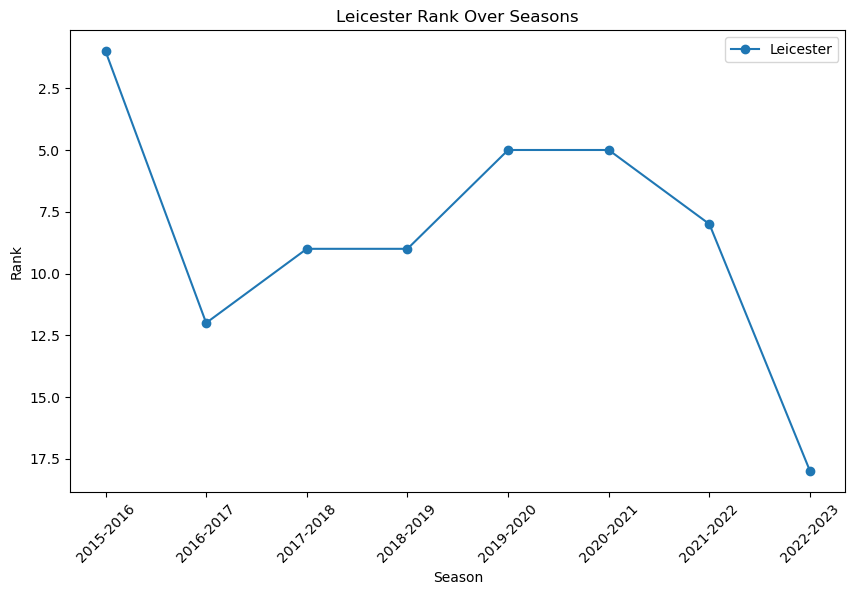

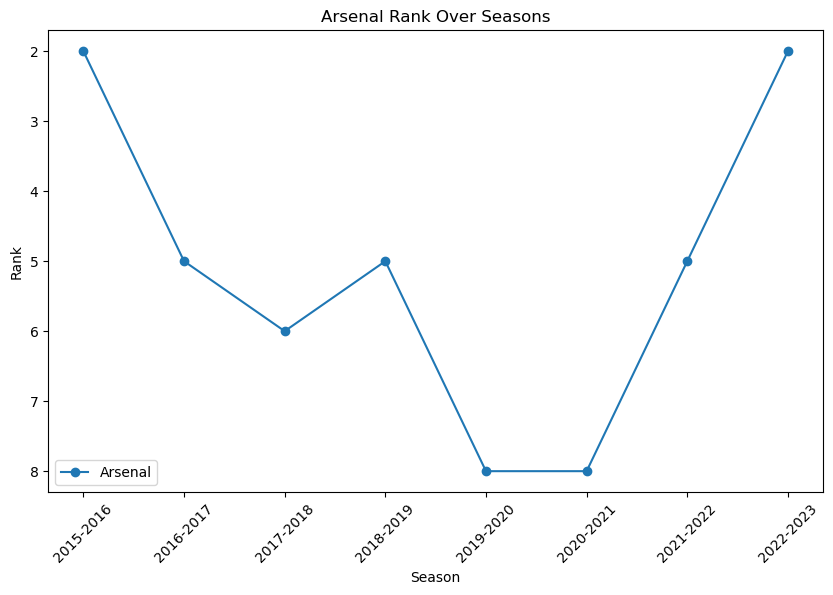

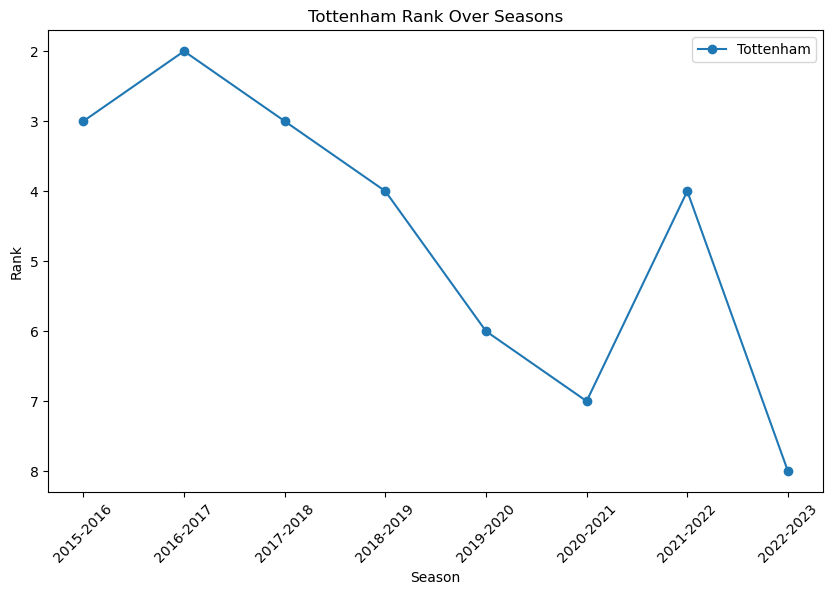

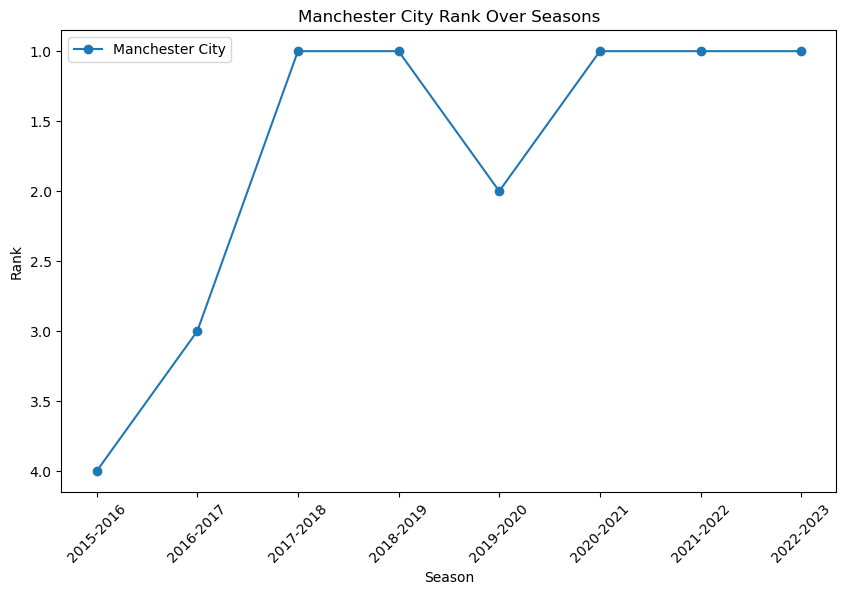

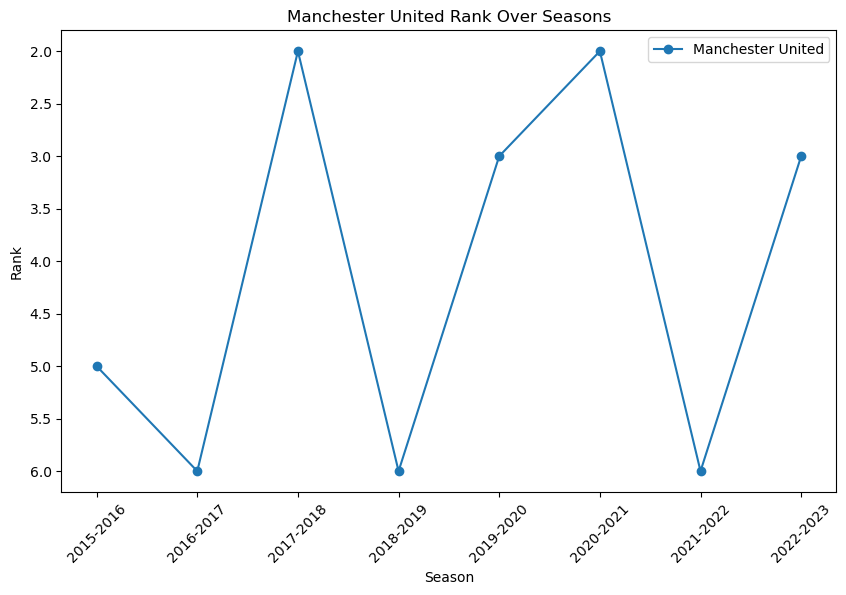

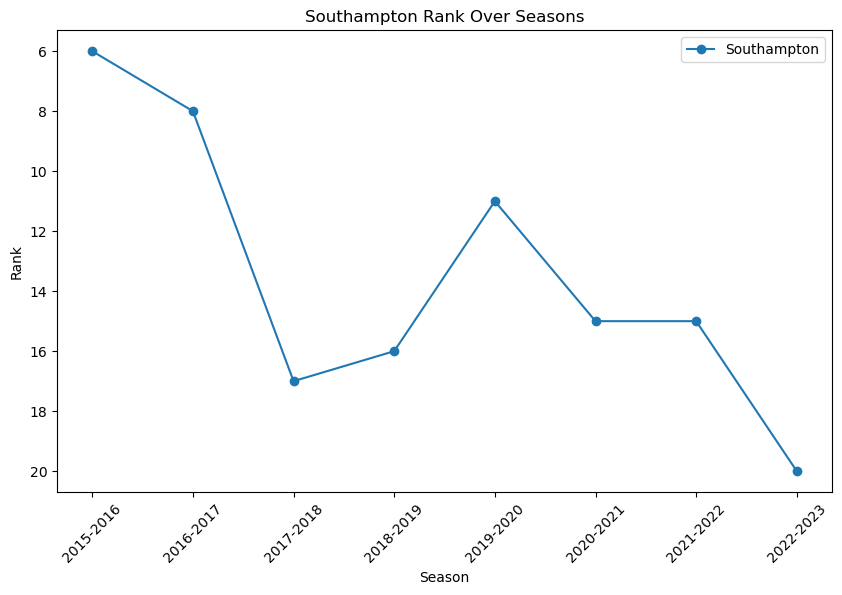

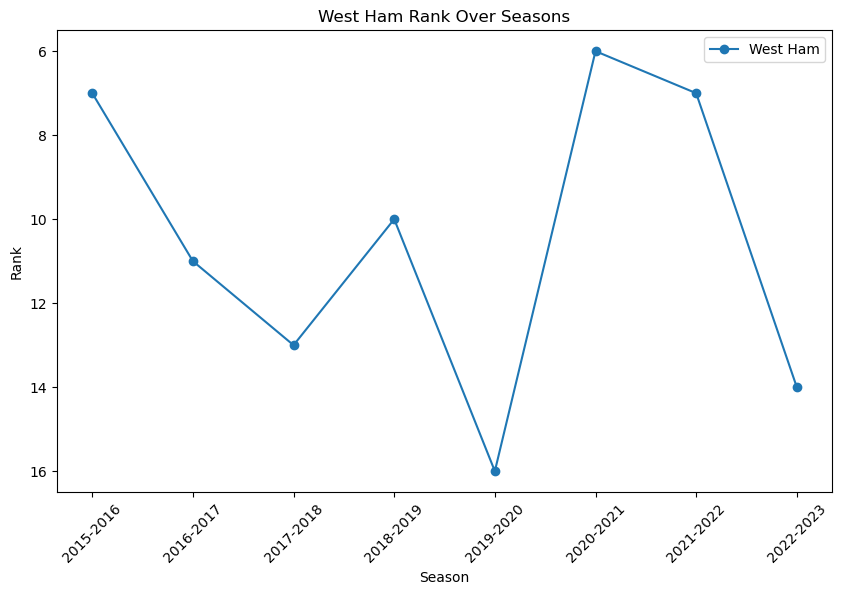

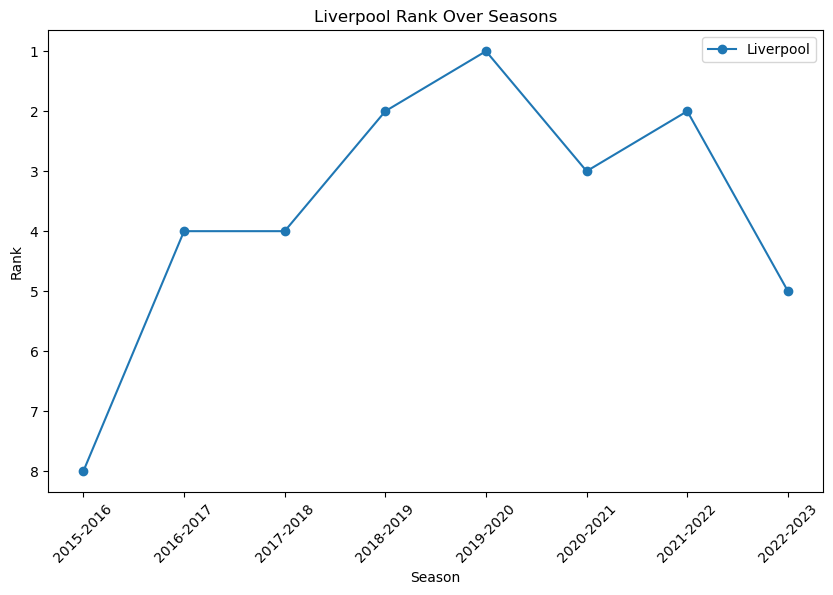

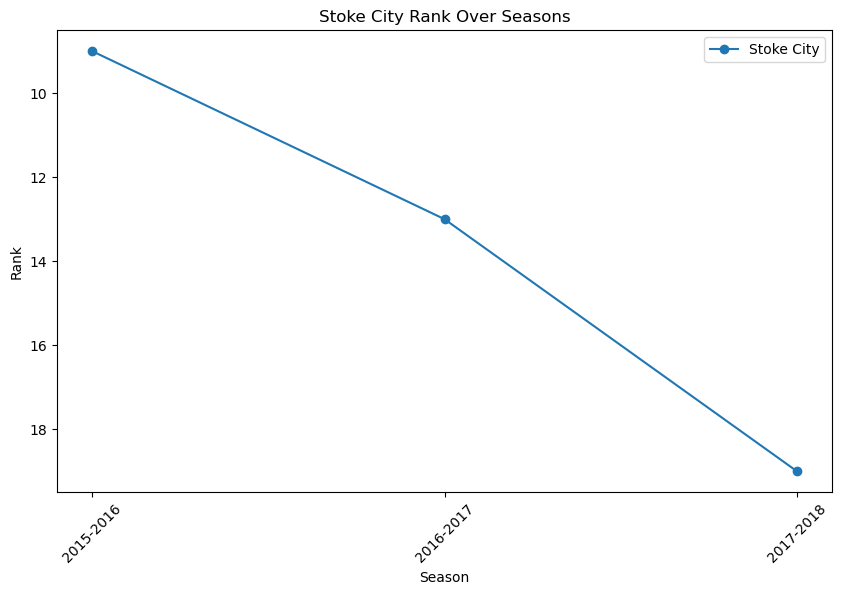

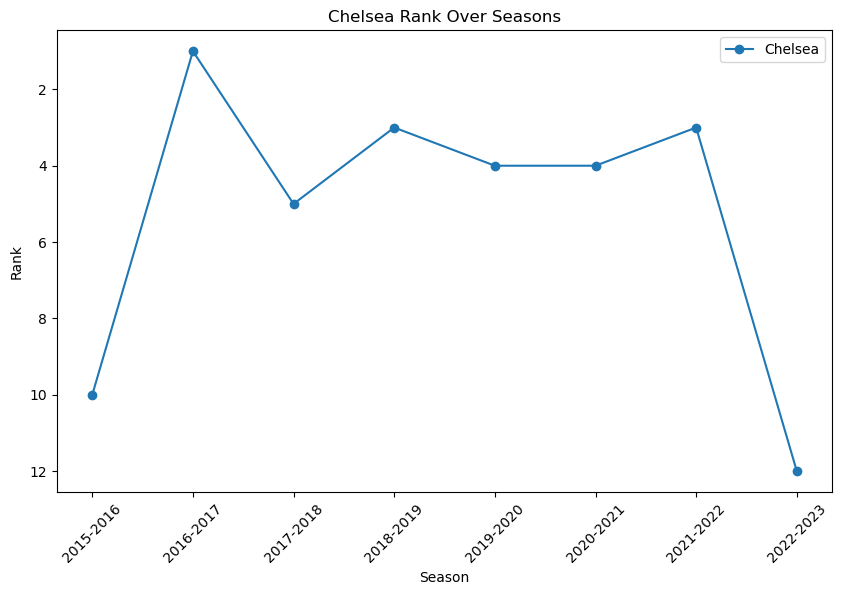

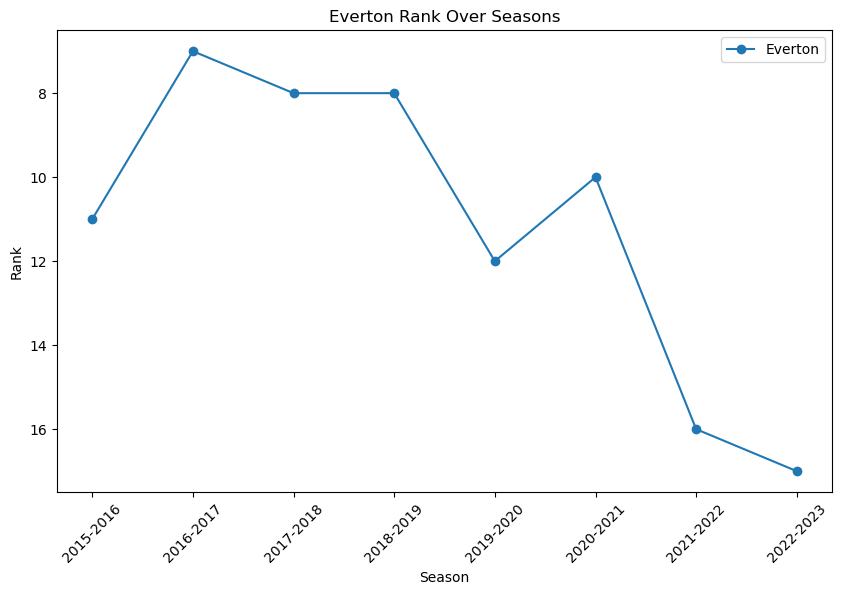

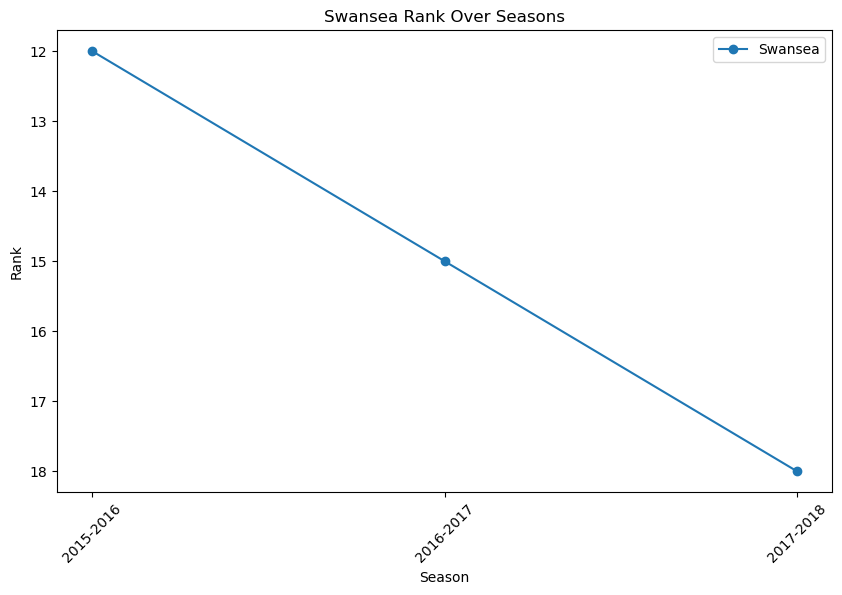

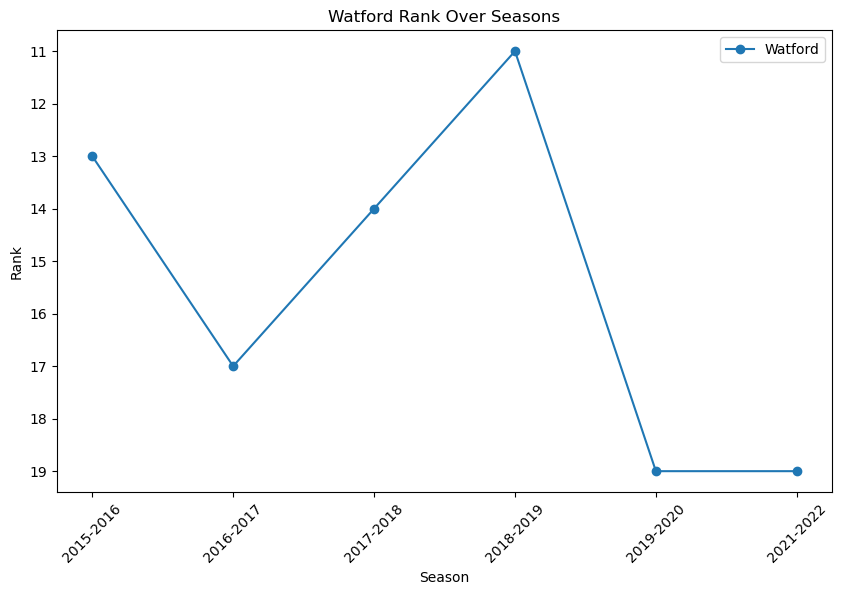

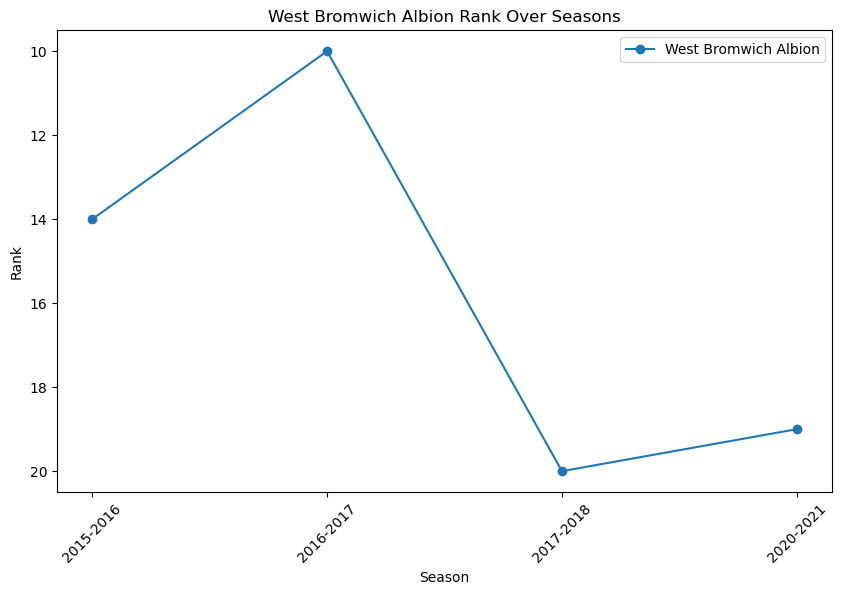

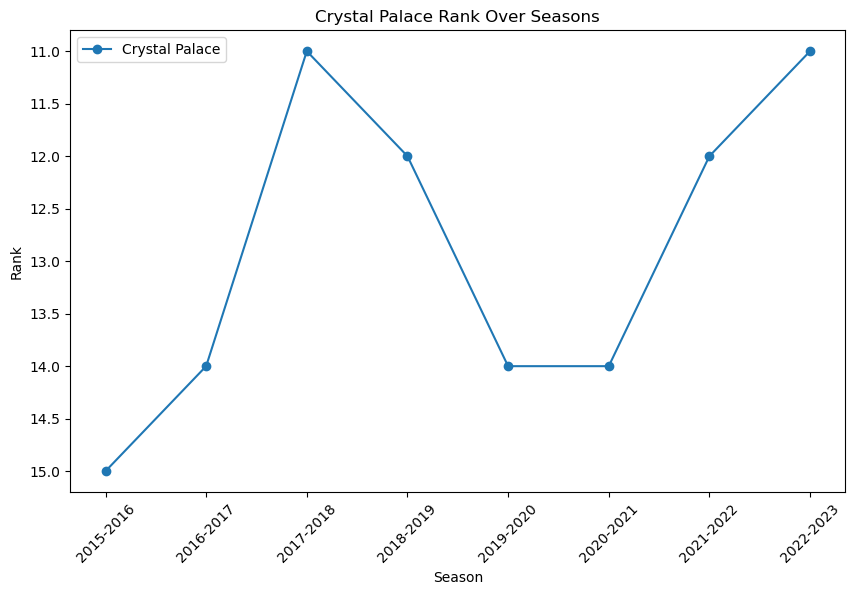

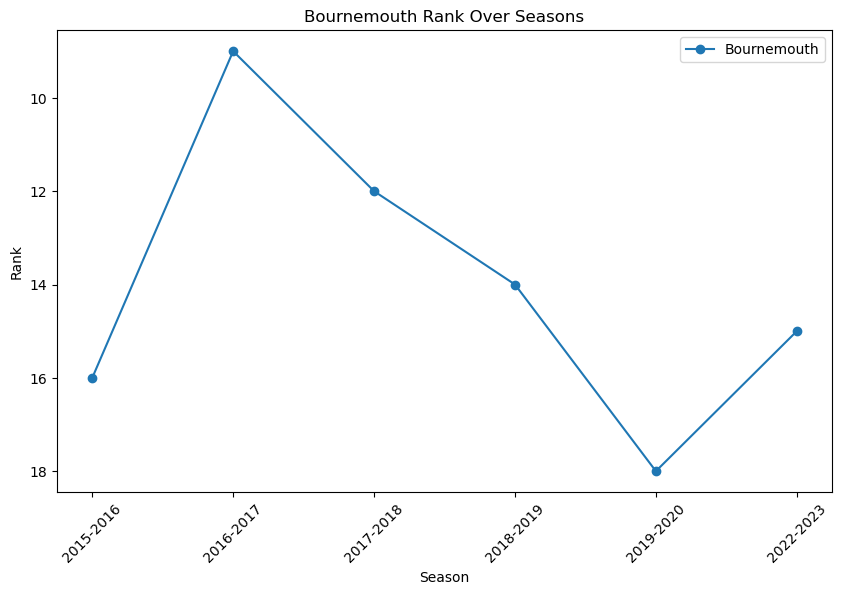

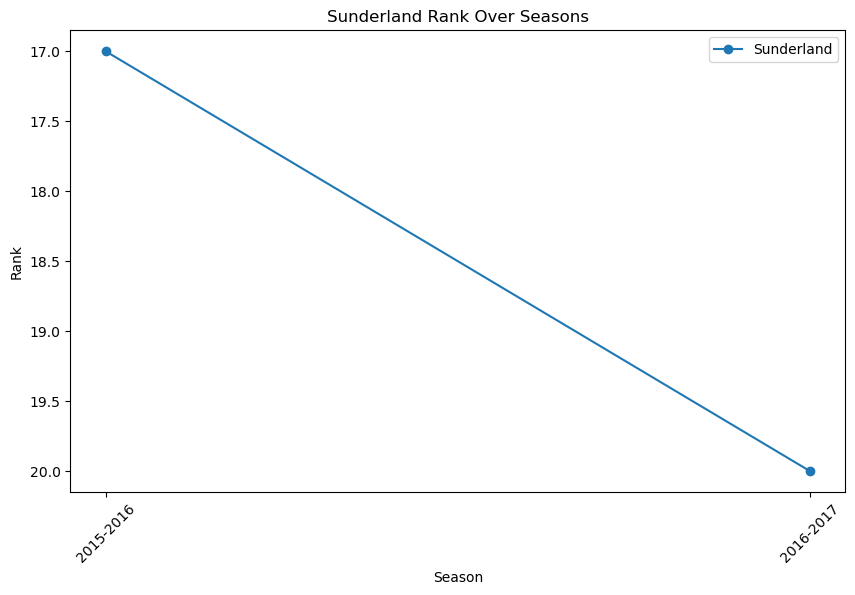

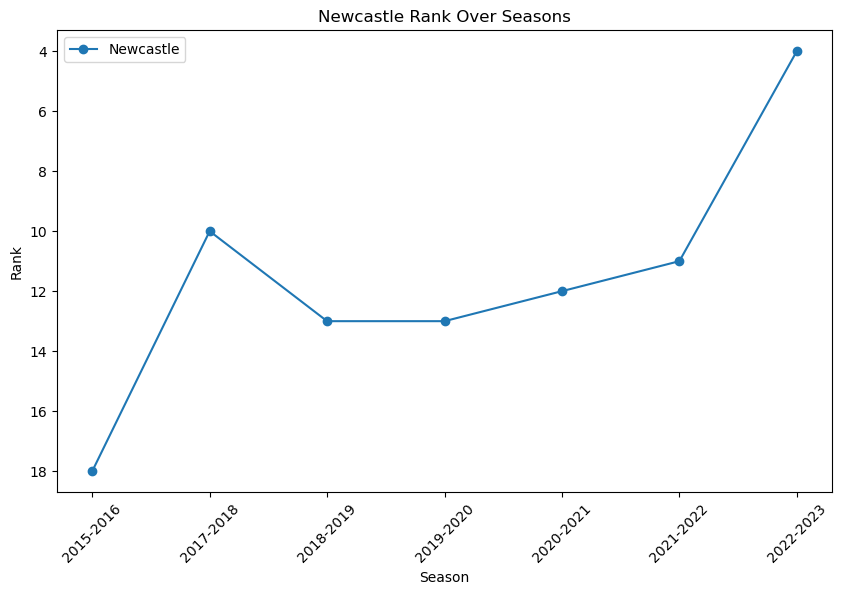

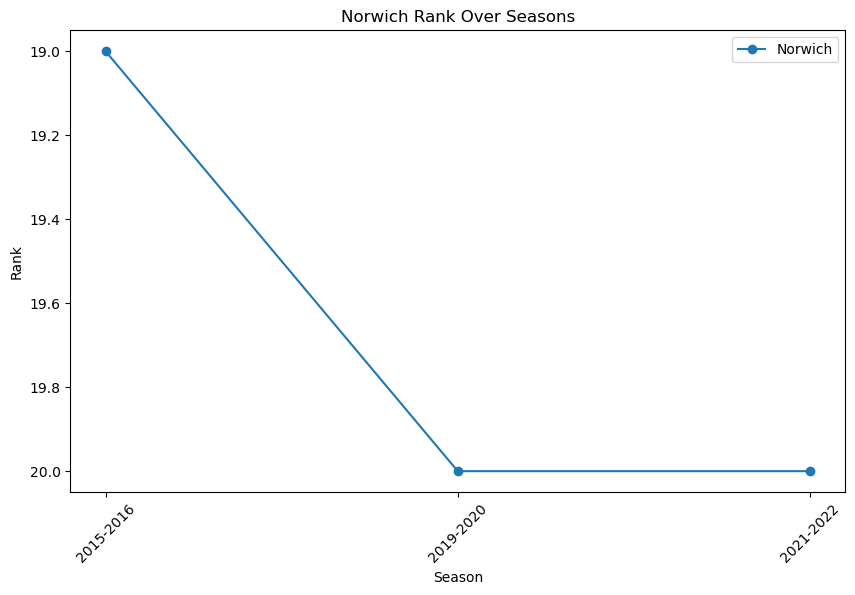

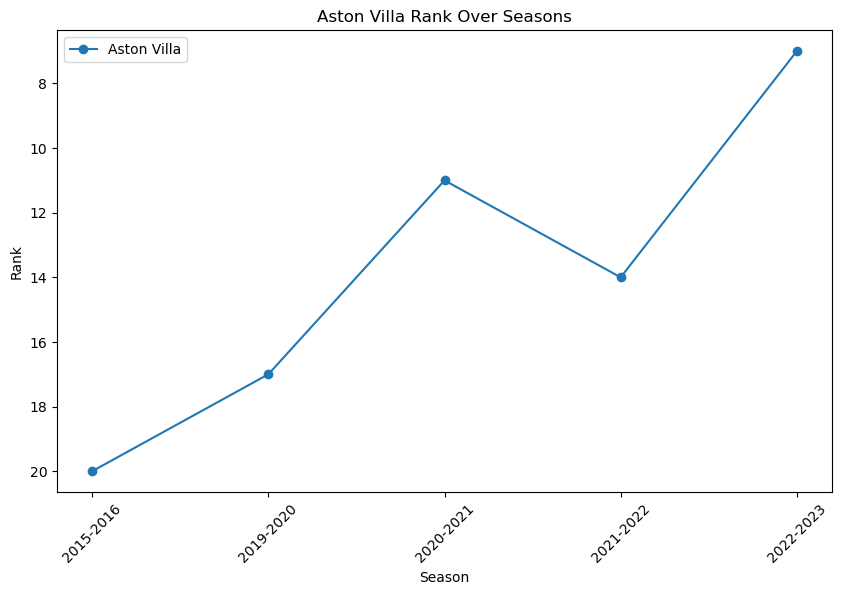

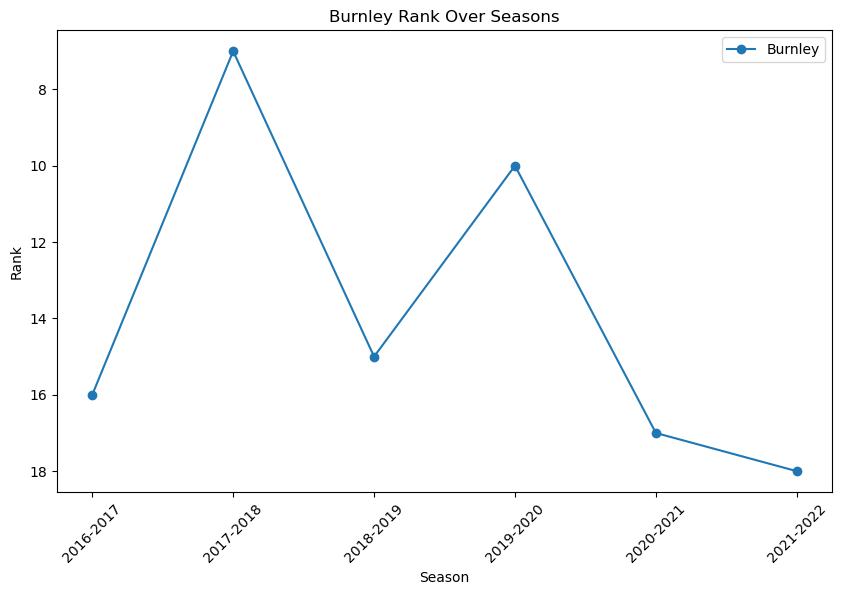

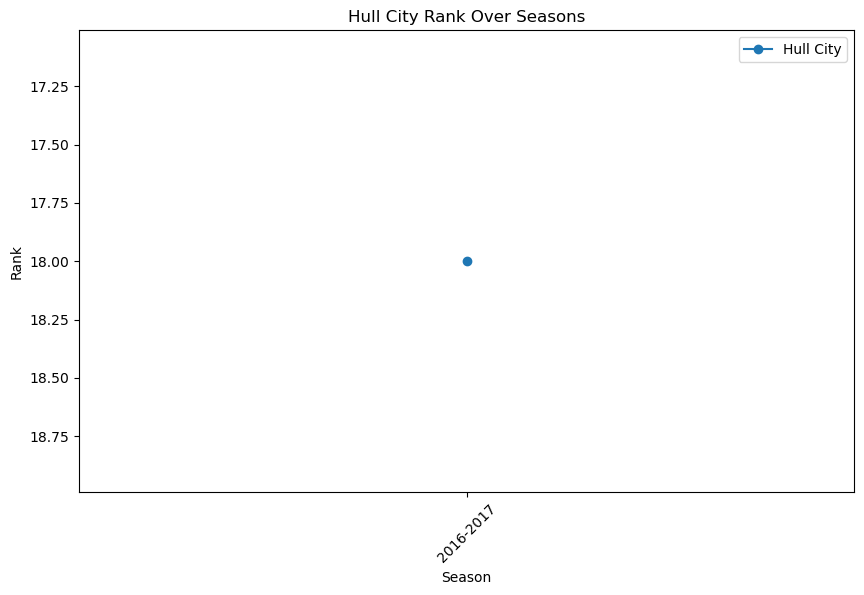

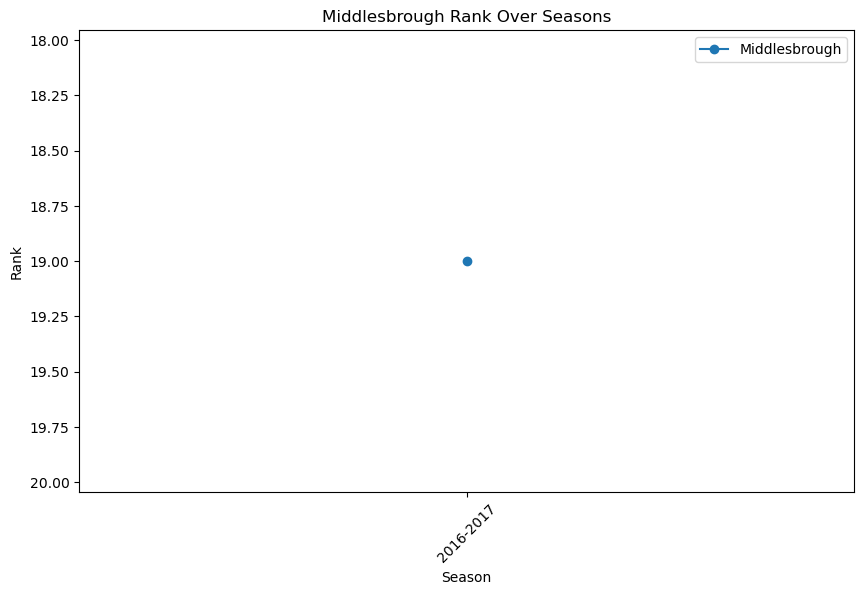

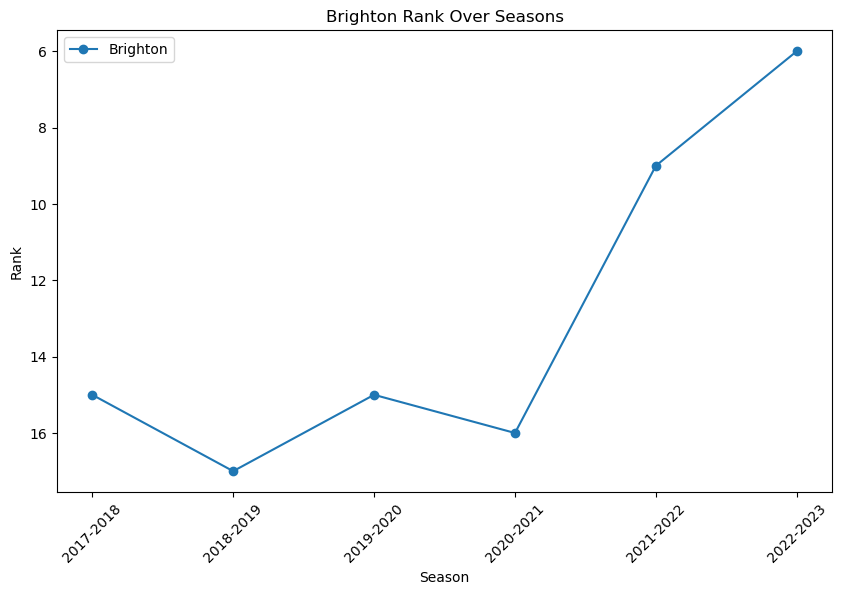

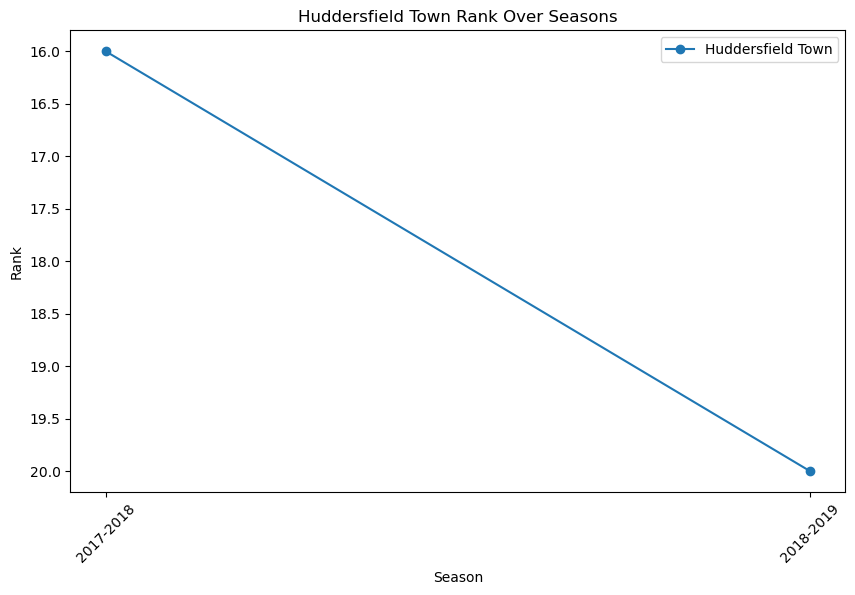

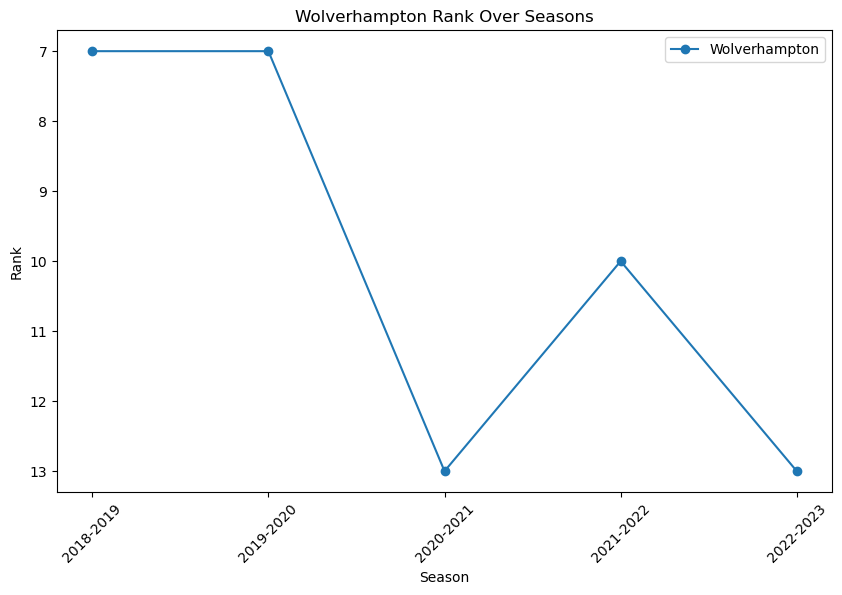

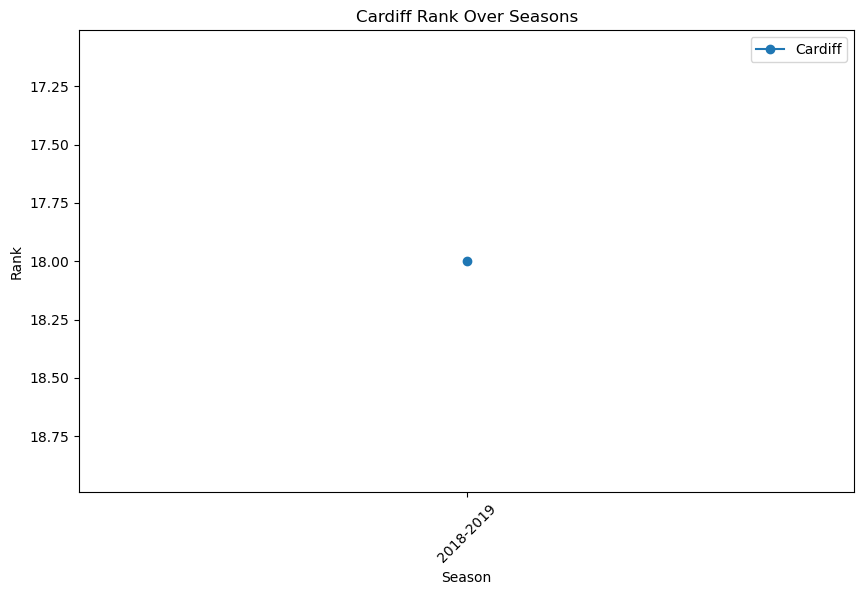

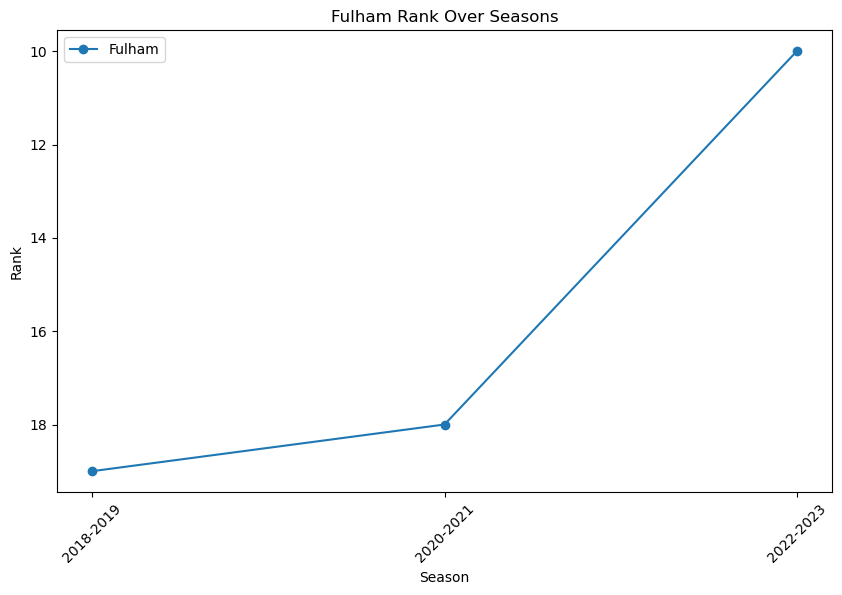

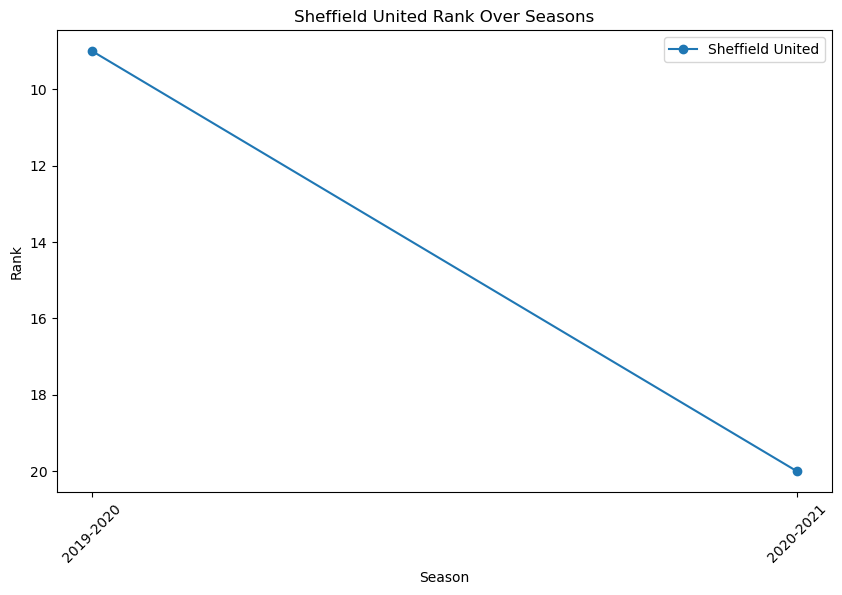

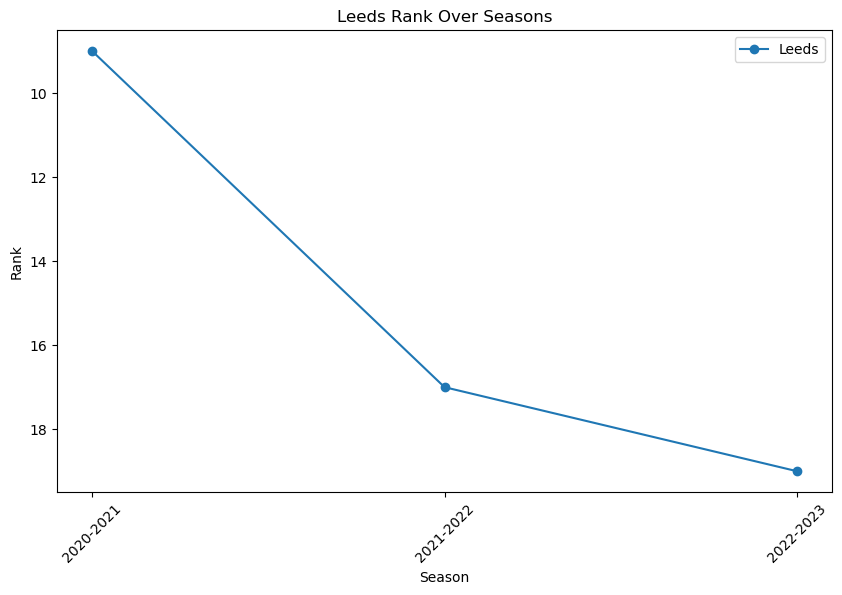

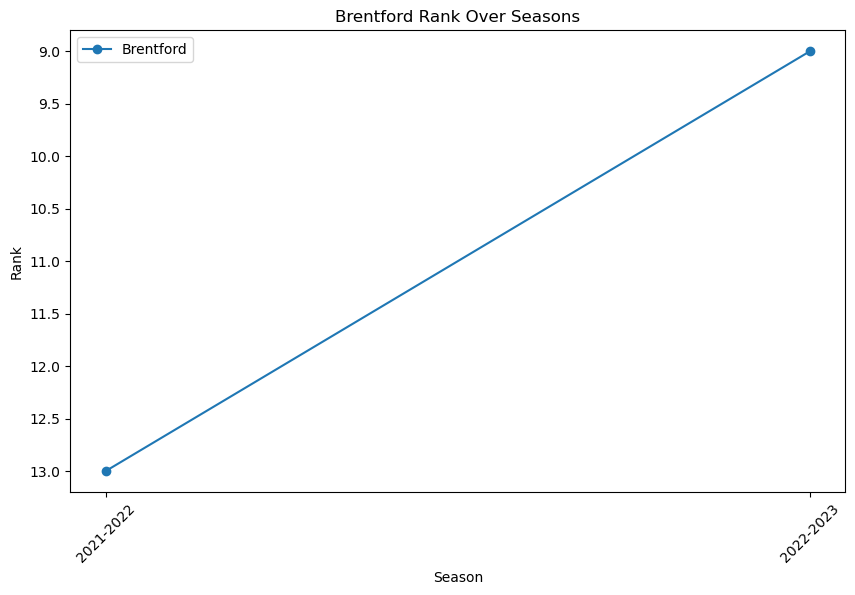

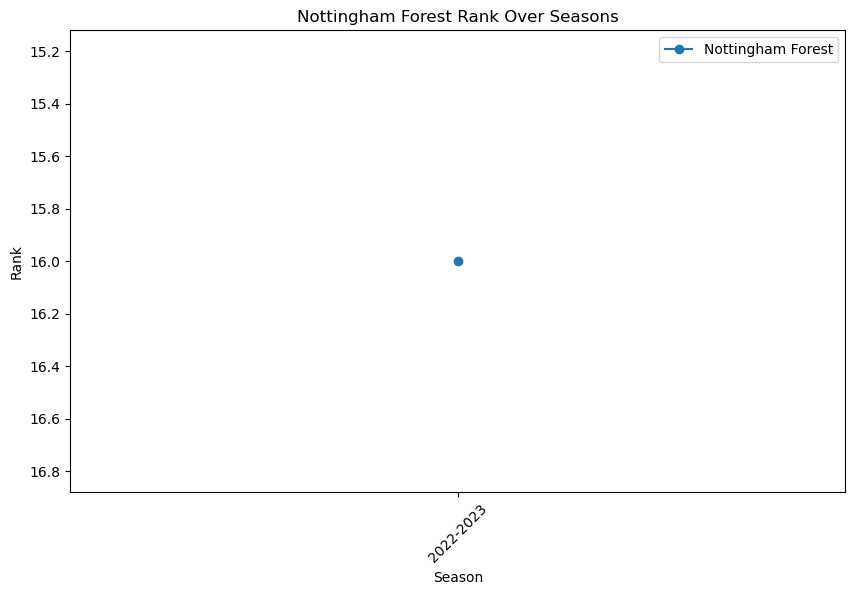

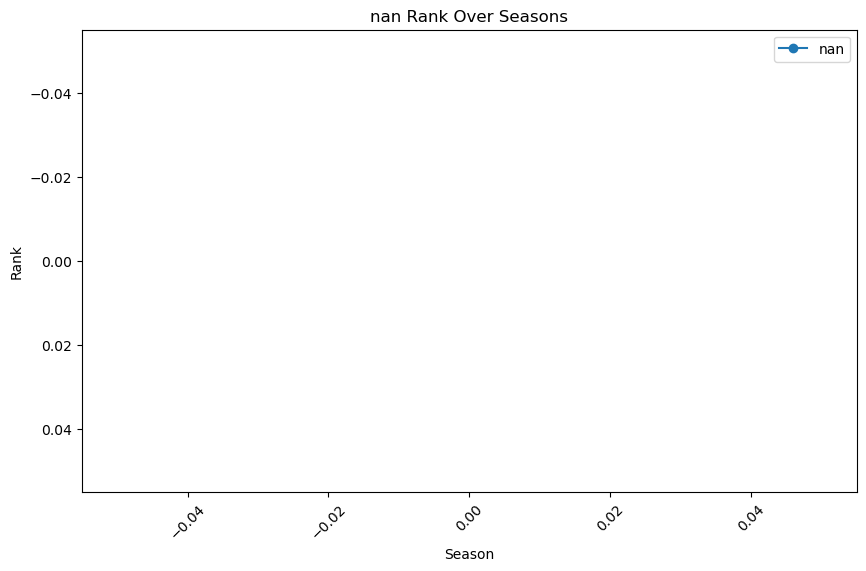

In [104]:
#now let's see make a line chart of the teams how thair result in 2015-2023
# Loop through each team and create a line chart for rank over the seasons
for team in unique_teams:
    team_data = complete_data[complete_data['Team'] == team]
    team_data = team_data.sort_values('Season')
    
    plt.figure(figsize=(10, 6))
    plt.plot(team_data['Season'], team_data['rank'], marker='o', label=team)
    plt.title(f'{team} Rank Over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    plt.gca().invert_yaxis()  # Invert y-axis to have the best rank (1) at the top
    plt.legend()
    plt.xticks(rotation=45)   # Rotate x-axis labels for better readability
    plt.show()


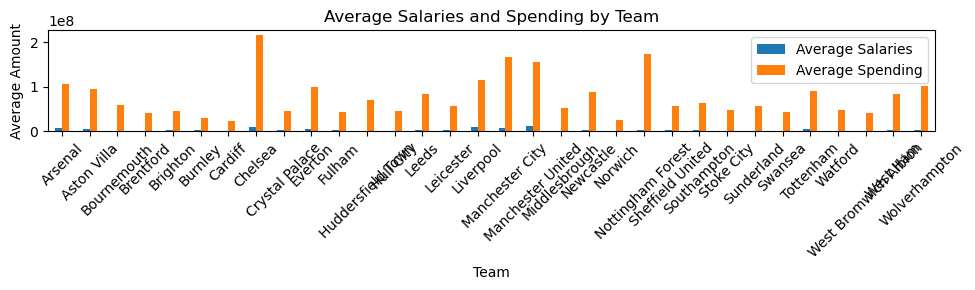

In [113]:
# Aggregate the data by team and calculate the mean 'salaries' and 'spending'
team_finances = complete_data.groupby('Team')[['salaries', 'spending']].mean()

# Create a bar chart for each team
team_finances.plot(kind='bar', figsize=(10, 3))

# Set the title and labels
plt.title('Average Salaries and Spending by Team')
plt.xlabel('Team')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(['Average Salaries', 'Average Spending'])

# Show the plot
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()